In [1]:
import sys
sys.path
sys.path.append('/home/mnt/nzh/nzhanglab/project/shuang/miniconda3/envs/scglue2/lib/python3.8/site-packages')



In [2]:
import anndata
import itertools
import networkx as nx
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

In [3]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [4]:
rna = anndata.read_h5ad("greenleaf/rna_preprocessed_v2.h5ad")
atac = anndata.read_h5ad("greenleaf/atac_preprocessed_v2.h5ad")
graph = nx.read_graphml("greenleaf/prior_v2.graphml.gz")

In [5]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [6]:
scglue.models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep="X_lsi"
)

In [7]:
graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    atac.var.query("highly_variable").index
))

In [8]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "atac": atac}, graph,
    fit_kws={"directory": "greenleaf_glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 0 as computation device.
[INFO] SCGLUEModel: Setting `graph_batch_size` = 39557
[INFO] SCGLUEModel: Setting `max_epochs` = 191
[INFO] SCGLUEModel: Setting `patience` = 16
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 8
[INFO] SCGLUETrainer: Using training directory: "greenleaf_glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.454, 'g_kl': 0.004, 'g_elbo': 0.458, 'x_rna_nll': 0.332, 'x_rna_kl': 0.011, 'x_rna_elbo': 0.343, 'x_atac_nll': 0.079, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.08, 'dsc_loss': 0.689, 'vae_loss': 0.442, 'gen_loss': 0.407}, val={'g_nll': 0.45, 'g_kl': 0.004, 'g_elbo': 0.454, 'x_rna_nll': 0.324, 'x_rna_kl': 0.01, 'x_rna_elbo': 0.334, 'x_atac_nll': 0.076, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.077, 'dsc_loss': 0.697, 'vae_loss': 0.429, 'gen_loss': 0.395}, 6.1s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.439, 'g_kl': 0.004, 'g_elbo': 0.444, 'x_rna_nll': 0.318, 'x_rn

2022-06-28 19:56:58,457 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "52"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (18, 25)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 39557
[INFO] SCGLUEModel: Setting `align_burnin` = 32
[INFO] SCGLUEModel: Setting `max_epochs` = 191
[INFO] SCGLUEModel: Setting `patience` = 16
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 8
[INFO] SCGLUETrainer: Using training directory: "greenleaf_glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.426, 'g_kl': 0.004, 'g_elbo': 0.429, 'x_rna_nll': 0.315, 'x_rna_kl': 0.01, 'x_rna_elbo': 0.325, 'x_atac_nll': 0.076, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.077, 'dsc_loss': 0.69, 'vae_loss': 0.419, 'gen_loss': 0.384}, val={'g_nll': 0.426,

2022-06-28 20:07:10,992 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "67"...


In [9]:
glue.save("greenleaf_glue_v2.dill")

In [10]:
glue = scglue.models.load_model("greenleaf_glue_v2.dill")

In [11]:
dx = scglue.models.integration_consistency(
    glue, {"rna": rna, "atac": atac}, graph,
    count_layers={"rna": "counts"}
)
dx

[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 10 common metacells...


/home/mnt/nzh/nzhanglab/project/shuang/miniconda3/envs/scglue2/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 20 common metacells...


/home/mnt/nzh/nzhanglab/project/shuang/miniconda3/envs/scglue2/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 50 common metacells...


/home/mnt/nzh/nzhanglab/project/shuang/miniconda3/envs/scglue2/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 99 common metacells...


/home/mnt/nzh/nzhanglab/project/shuang/miniconda3/envs/scglue2/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 199 common metacells...


/home/mnt/nzh/nzhanglab/project/shuang/miniconda3/envs/scglue2/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


,n_meta,consistency
0,10,0.142397
1,20,0.077037
2,50,0.068868
3,100,0.051844
4,200,0.040870


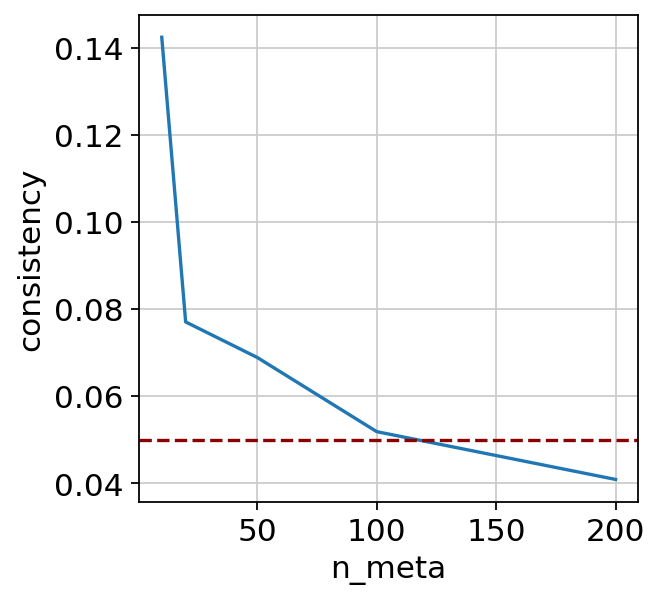

In [12]:
_ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")


In [13]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

In [14]:
import numpy
rna.obs_names = numpy.char.add("rna",rna.obs_names)
atac.obs_names = numpy.char.add("atac",atac.obs_names)

In [15]:
combined = anndata.concat([rna, atac])


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [16]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)

/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'domain' as categorical


KeyError: 'Could not find key cell_type in .var_names or .obs.columns.'

<Figure size 1056x320 with 0 Axes>

In [ ]:
feature_embeddings = glue.encode_graph(graph)
feature_embeddings = pd.DataFrame(feature_embeddings, index=glue.vertices)
feature_embeddings.iloc[:5, :5]

In [ ]:
glue_array = combined.obsm['X_glue']
import numpy as np
glue_array = pd.DataFrame(glue_array)
glue_array.index = np.concatenate([rna.obs_names,atac.obs_names])

In [ ]:
glue_array.info()

In [ ]:
glue_array.to_csv('/home/mnt/nzh/nzhanglab/project/shuang/scATAC/comparison_methods/scglue/greenleaf_glue_embeddings_v2.csv', index=True)